# Movie Industry Analysis

### Introduction

The movie industry has contributed significantly to the global culture, entertainment, and economy. To gain deeper insights into this dynamic industry, this project focuses on exploring data trends and behaviors over time using a dataset sourced from Kaggle https://www.kaggle.com/datasets/danielgrijalvas/movies. The dataset contains information about movies from 1980 to 2020, including key attributes such as rating, genres, gross revenue, budgets, release dates, and more.

Objectives

The main objectives of this project are:

1. General Exploratory Analysis:
    - Identify and address missing or inconsistent data to prepare the dataset for meaningful analysis.

    - Understand the distribution and characteristics of the dataset, including key statistics and trends in numeric and categorical attributes.

2. Behavior Over Time:

    - Investigate how the movie industry's metrics, such as the number of releases, gross revenue, and genre popularity, have evolved over the years.

    - Analyze correlations and patterns, such as the relationship between budget and gross revenue, to uncover insights into movie performance.

Data Overview

The dataset provides a rich foundation for analysis, with fields such as:

- Name: The title of the movie.

- Rating: Classification of content suitability (e.g., PG-13, R).

- Genre: Genres assigned to the movie (e.g., Action, Drama).

- Score: Audience or critic ratings (e.g., IMDb scores).

- Votes: Number of votes the movie received.

- Budget: Estimated production cost.

- Gross: Revenue of the movie.

- Release Date: When the movie was released.

### Data cleaning and preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_original = pd.read_csv('movies.csv')
df = df_original.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [5]:
df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [6]:
df['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', nan, 'United Arab Emirates', 'Indonesia', 'Turkey',
       'Serbia', 'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile',
       'Panama', 'Malta', 'Lebanon'], dtype=object)

One of the objectives of this project is to identify patterns and relationships between the numeric fields.
There exist Null values with the majority of them present in the budget field. To
perform a correct analysis, the elimination of the rows with missing values was decided.

In [7]:
# Remove rows with Null values
df = df.dropna().reset_index(drop=True)

In [8]:
# Convert float type columns to integer if all values end with zero decimal
def convert_column_to_int(col):
    if all(col.dropna() % 1 == 0):
        return col.astype('int64')
    return col

columns_to_check = ['votes', 'budget', 'gross', 'runtime']
df[columns_to_check] = df[columns_to_check].apply(convert_column_to_int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   int64  
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 635.4+ KB


In [10]:
# Transform strings with formats Month day, year; Month, year; and year to datetime 
def extract_date(info):
    try:
        date_part = info.split(' (')[0]
        for fmt in ['%B %d, %Y', '%B %Y', '%Y']:
            try:
                return datetime.strptime(date_part, fmt).date()
            except ValueError:
                continue
    except (ValueError, IndexError):
        return None

# Create a new column 'released_date' with the extracted date
df['released_date'] = df['released'].apply(extract_date)

In [11]:
df[df['released_date'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date


In [12]:
df['released_date'] = pd.to_datetime(df['released_date'], errors='coerce')

In [13]:
df_eda = df.copy()

In [14]:
df_eda.drop(columns=['year','released'], inplace=True)

In [15]:
categorical_columns = ['rating', 'genre', 'country', 'director', 'writer', 'star', 'company']
df_eda[categorical_columns] = df_eda[categorical_columns].astype('category')

In [16]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           5421 non-null   object        
 1   rating         5421 non-null   category      
 2   genre          5421 non-null   category      
 3   score          5421 non-null   float64       
 4   votes          5421 non-null   int64         
 5   director       5421 non-null   category      
 6   writer         5421 non-null   category      
 7   star           5421 non-null   category      
 8   country        5421 non-null   category      
 9   budget         5421 non-null   int64         
 10  gross          5421 non-null   int64         
 11  company        5421 non-null   category      
 12  runtime        5421 non-null   int64         
 13  released_date  5421 non-null   datetime64[ns]
dtypes: category(7), datetime64[ns](1), float64(1), int64(4), object(1)
memor

### Data Analysis

1. General insights

In [17]:
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")

Column 'rating' has 10 unique values.
Column 'genre' has 15 unique values.
Column 'country' has 50 unique values.
Column 'director' has 2063 unique values.
Column 'writer' has 3205 unique values.
Column 'star' has 1845 unique values.
Column 'company' has 1475 unique values.


In [18]:
for col in categorical_columns:
    print(f"\nColumn '{col}' - Top 5 Most Frequent Categories:")
    print(df[col].value_counts().head(5))


Column 'rating' - Top 5 Most Frequent Categories:
R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Name: rating, dtype: int64

Column 'genre' - Top 5 Most Frequent Categories:
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Name: genre, dtype: int64

Column 'country' - Top 5 Most Frequent Categories:
United States     4319
United Kingdom     492
Canada             111
France             105
Germany             82
Name: country, dtype: int64

Column 'director' - Top 5 Most Frequent Categories:
Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Ridley Scott         23
Steven Soderbergh    23
Name: director, dtype: int64

Column 'writer' - Top 5 Most Frequent Categories:
Woody Allen     32
Stephen King    29
John Hughes     20
Luc Besson      14
Joel Coen       13
Name: writer, dtype: int64

Column 'star' - Top 5 Most Frequent Categories:
Nicolas Cage      40
Robert De Niro    38
Tom H

In [19]:
numeric_columns = ['score', 'votes', 'budget', 'gross', 'runtime']

print("Summary Statistics of Numeric Columns:")
df[numeric_columns].describe()


Summary Statistics of Numeric Columns:


,score,votes,budget,gross,runtime
count,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


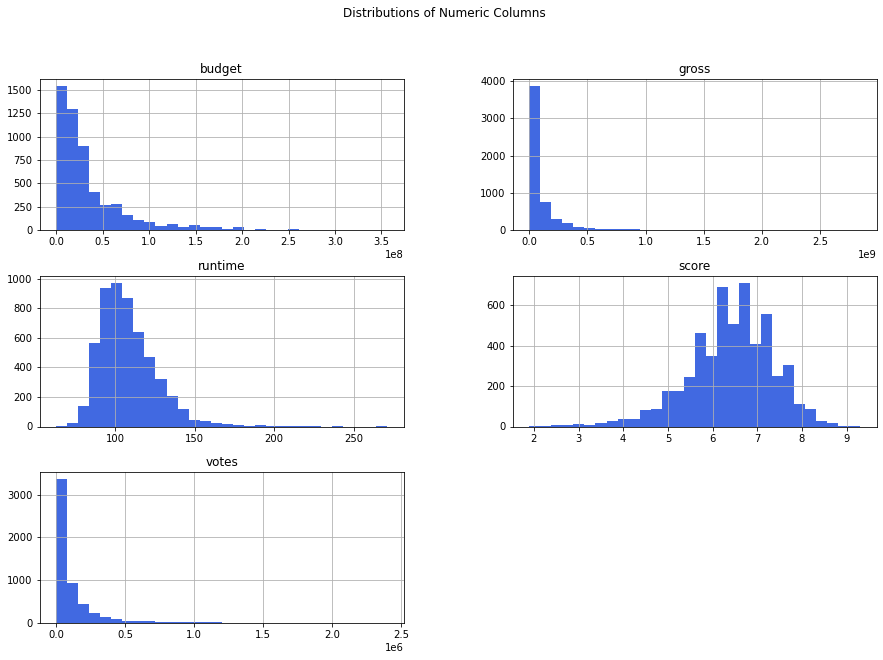

In [20]:
df[numeric_columns].hist(bins=30, figsize=(15, 10), grid=True, color='royalblue')
plt.suptitle("Distributions of Numeric Columns")
plt.show()

Correlation between numeric fields

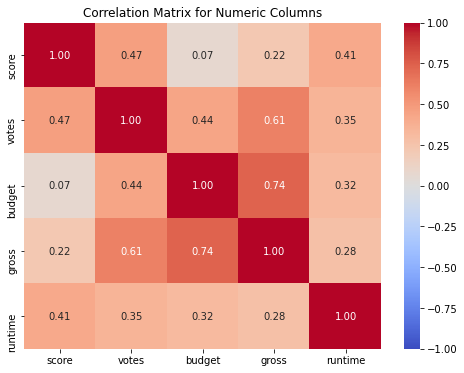

In [21]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numeric Columns")
plt.show()

- By observing the result, we can infer the following correlations.
    - Strong positive correlation: budget-gross, votes-gross.
    - Mild positive correlation: budget-votes, runtime-score.
    - Low or null positive correlation: the rest of the relationships.
    - There are no negative correlations.

Relationship between budget and gross. The numeric fields with higher correlation

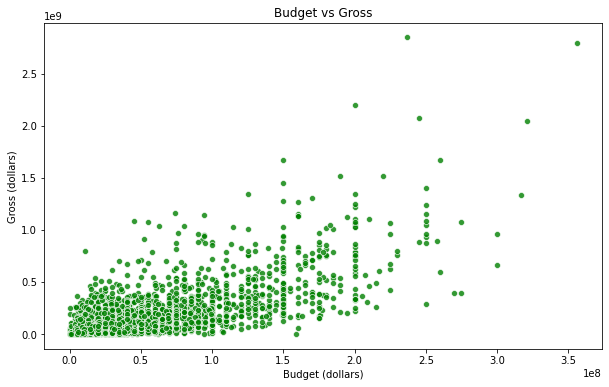

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='budget', y='gross', alpha=0.8, color='green')

plt.title("Budget vs Gross")
plt.xlabel("Budget (dollars)")
plt.ylabel("Gross (dollars)")
plt.show()


To analyze the data in relation to time, the records of 2020 were removed, since the data after the cleaning only contains records until January 10, 2020.

In [23]:
df_eda['released_year'] = df_eda['released_date'].dt.year

In [44]:
newest_record = df.loc[df_eda['released_year'].idxmax()]
print("Newest Record:")
newest_record.released_date

Newest Record:


Timestamp('2020-01-10 00:00:00')

In [25]:
filtered_year = df_eda[df_eda['released_year'] < 2020]

Relationship between the total number of movies of any genre released and the total gross profit of movies over time

In [26]:
yearly_releases_and_gross = (
    filtered_year.groupby('released_year').agg(
        total_releases=('released_year', 'size'),
        total_gross=('gross', 'sum')
    ).reset_index()
)

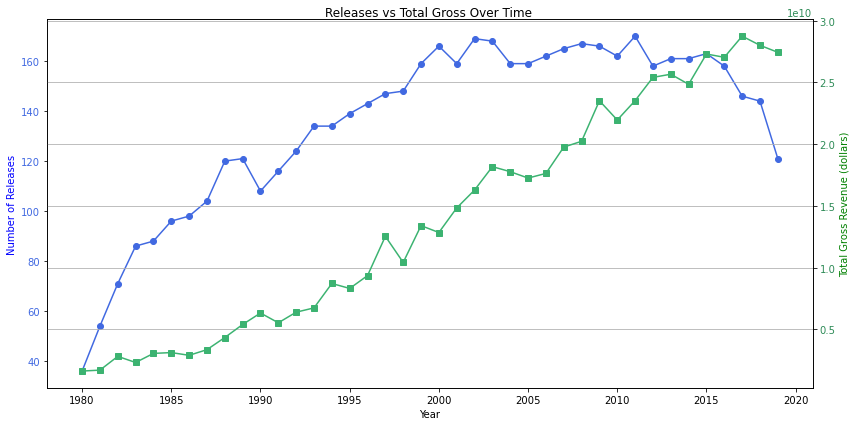

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Releases', color='blue')
ax1.plot(yearly_releases_and_gross['released_year'], yearly_releases_and_gross['total_releases'], color='royalblue', marker='o', label='Releases')
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax1.twinx()
ax2.set_ylabel('Total Gross Revenue (dollars)', color='green')
ax2.plot(yearly_releases_and_gross['released_year'], yearly_releases_and_gross['total_gross'], color='mediumseagreen', marker='s', label='Gross')
ax2.tick_params(axis='y', labelcolor='seagreen')

fig.suptitle("Releases vs Total Gross Over Time")
fig.tight_layout()
plt.grid()
plt.show()


- It can be observed an increase in movie productions from 1980 until 2000, a similar number of releases between 2000 and 2015, and a decrease since then until the end of 2019. Also, the total gross of the movie industry has been increasing as the number of released movies increases. It is possible to see that between 2015 and 2019 when the number of releases dropped, the total gross profit of movies continued increasing.

Budget-gross correlation behavior over time.

In [28]:
budget_gross_correlation = (
    filtered_year.groupby('released_year')[['budget', 'gross']].corr()
    .iloc[0::2, -1]
    .reset_index()
    .rename(columns={'gross': 'correlation_budget_gross'})
)


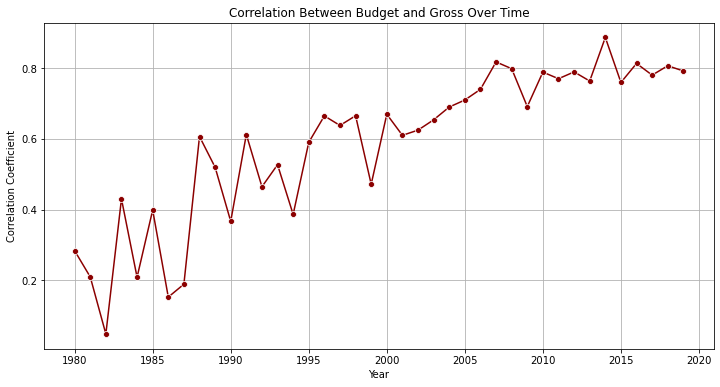

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=budget_gross_correlation, x='released_year', y='correlation_budget_gross', marker='o', color='darkred')
plt.title("Correlation Between Budget and Gross Over Time")
plt.xlabel("Year")
plt.ylabel("Correlation Coefficient")
plt.grid()
plt.show()

- It can be observed that since 1988 the correlation between budget and revenue has become significant, with an increase to a strong correlation since 2005. 

Genre distribution analysis

In [30]:
genre_distribution = filtered_year.groupby(['released_year', 'genre']).size().reset_index(name='count')

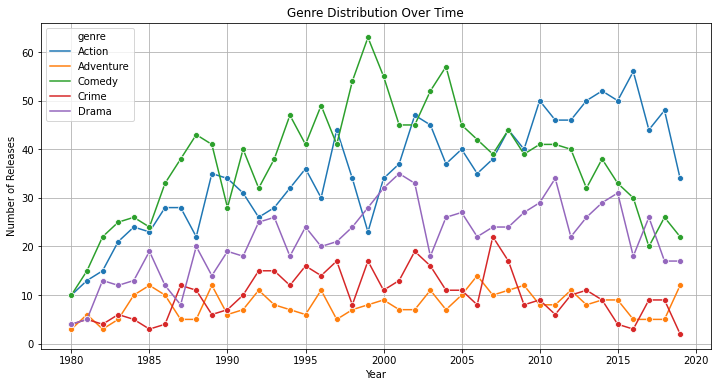

In [31]:
top_genres = genre_distribution.groupby('genre')['count'].sum().sort_values(ascending=False).head(5).index
selected_genre_distribution = genre_distribution[genre_distribution['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_genre_distribution, x='released_year', y='count', hue='genre', marker='o')
plt.title("Genre Distribution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.legend()
plt.grid()
plt.show()


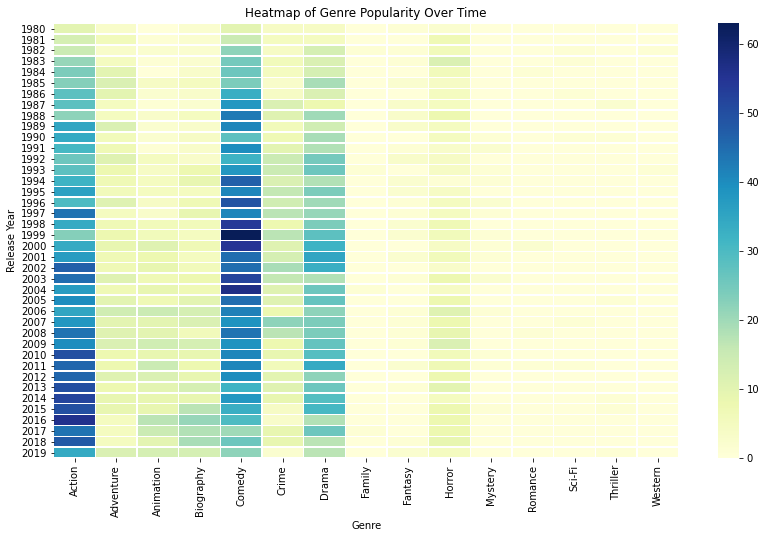

In [32]:
genre_heatmap = genre_distribution.pivot('released_year', 'genre', 'count').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(genre_heatmap, cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap of Genre Popularity Over Time")
plt.xlabel("Genre")
plt.ylabel("Release Year")
plt.show()


- It can be observed that historically the 3 most popular genres for movie production were Action, Comedy, and Drama. Moreover, the Action genre presents a notable increase in popularity in the last 10 years of records in this data. Also, is notable that the Comedy genre reached a peak in popularity between 1998 and 2000. 

Average score, average gross and movie count per genre

In [33]:
genre_analysis = df_eda.groupby('genre').agg(
    average_score=('score', 'mean'),
    average_gross=('gross', 'mean'),
    movie_count=('genre', 'count')
).sort_values(by='average_gross', ascending=False)

genre_analysis

,average_score,average_gross,movie_count
genre,,,
Family,6.675000,5.185831e+08,4
Animation,6.690614,2.811044e+08,277
Action,6.247350,1.680232e+08,1415
Adventure,6.268196,1.332682e+08,327
Mystery,6.670588,1.178877e+08,17
Biography,7.088103,6.139527e+07,311
Drama,6.721437,6.036914e+07,863
Comedy,6.190709,5.916766e+07,1496
Horror,5.827490,5.681695e+07,251


In [34]:
temp_df = genre_analysis.reset_index(drop=False).sort_values('average_gross', ascending=False).copy()

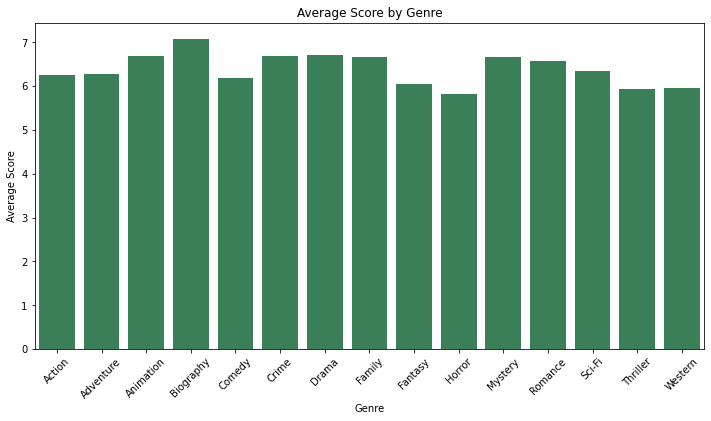

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=temp_df, x='genre', y='average_score', color='seagreen')
plt.title("Average Score by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

- It can be seen that the Biography genre has the maximum average score, and the Horror genre has the minimum. There is not a significant general difference between the score of a movie by genre.

Average gross profit by movie genre

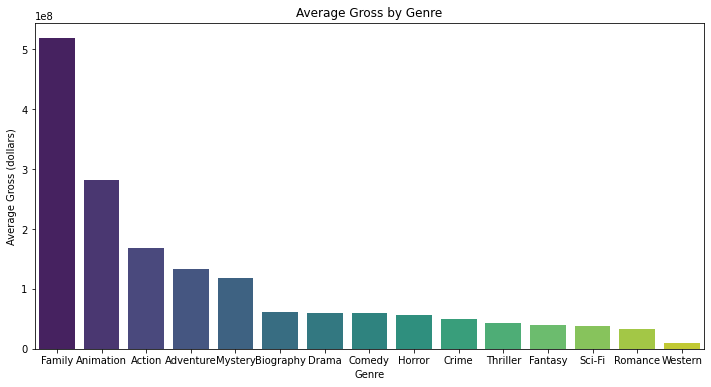

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=temp_df, x='genre', y='average_gross', palette='viridis', order=temp_df.genre)
plt.title("Average Gross by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Gross (dollars)")
plt.show()


- It is notable that on average the Family genre has the most gross profit among all the genres, followed by Animation, and Action. It is important to mention that there are only 4 records of Family movies, compared to the 277 of Animation movies, and 1415 of Actions movies. This big difference might have impacted the result of this analysis.

In [37]:
highest_gross = df.loc[df_eda['gross'].idxmax()]
print("Movie with highest gross profit:")
highest_gross

Movie with highest gross profit:


name                                        Avatar
rating                                       PG-13
genre                                       Action
year                                          2009
released         December 18, 2009 (United States)
score                                          7.8
votes                                      1100000
director                             James Cameron
writer                               James Cameron
star                               Sam Worthington
country                              United States
budget                                   237000000
gross                                   2847246203
company                      Twentieth Century Fox
runtime                                        162
released_date                  2009-12-18 00:00:00
Name: 3731, dtype: object

Directors with highest impact in the score of a movie

In [38]:
top_directors = df_eda.groupby('director').agg(
    average_score=('score', 'mean'),
    movie_count=('director', 'count')
).sort_values(by='average_score', ascending=False)

top_directors.head(10)


,average_score,movie_count
director,,
Roberto Benigni,8.60,1
Tony Kaye,8.50,1
Sergio Leone,8.40,1
Nadine Labaki,8.40,1
Bob Persichetti,8.40,1
Stanley Kubrick,8.35,2
Lee Unkrich,8.30,2
Giuseppe Tornatore,8.30,2
Majid Majidi,8.30,1


Filtering directors with at least 3 movies produced

In [39]:
top_directors_filtered = top_directors[top_directors['movie_count'] >= 3]
top_directors_filtered.head(10)

,average_score,movie_count
director,,
Christopher Nolan,8.163636,11
Pete Docter,8.133333,3
Quentin Tarantino,8.100000,9
Hayao Miyazaki,8.100000,5
Denis Villeneuve,7.980000,5
Frank Darabont,7.975000,4
Damien Chazelle,7.933333,3
Bong Joon Ho,7.900000,4
James Cameron,7.871429,7


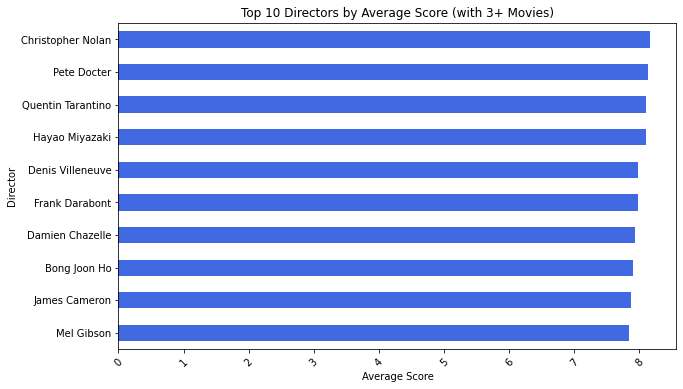

In [40]:
top_directors_filtered.head(10).sort_values(by='average_score', ascending=True).reset_index().plot(
    kind='barh', x='director', y='average_score', figsize=(10, 6), color='royalblue', legend=False
)
plt.title("Top 10 Directors by Average Score (with 3+ Movies)")
plt.xlabel("Average Score")
plt.ylabel("Director")
plt.xticks(rotation=45)
plt.show()

- It shows the directors that had produced the highest-scored movies on average. 

Main starts presence in the top 50 most profitable movies

In [41]:
highest_grossing_movies = df_eda.sort_values(by='gross', ascending=False).head(50).copy()

In [42]:
top_stars = highest_grossing_movies['star'].value_counts()
top_stars.head(10)


Robert Downey Jr.    5
Daisy Ridley         3
Chris Pratt          2
Vin Diesel           2
Johnny Depp          2
Steve Carell         2
Daniel Radcliffe     2
Tom Hanks            2
Christian Bale       2
Kristen Bell         2
Name: star, dtype: int64

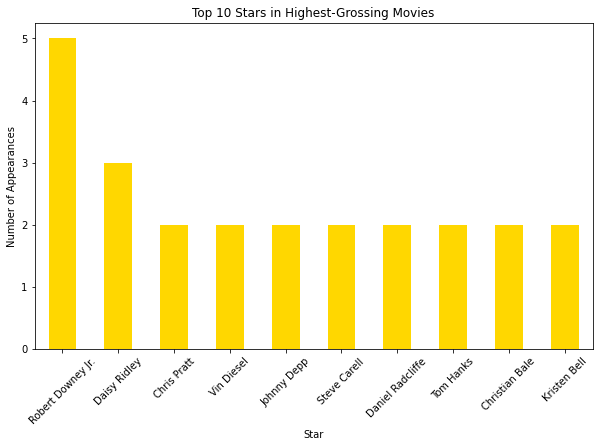

In [43]:
top_stars.head(10).plot(
    kind='bar', figsize=(10, 6), color='gold', legend=False
)
plt.title("Top 10 Stars in Highest-Grossing Movies")
plt.xlabel("Star")
plt.ylabel("Number of Appearances")
plt.xticks(rotation=45)
plt.show()

- It can be seen the main starts that have appeared in the historically most profitable movies, with Robert Downey Jr. with the most appearances.

### Conclusions

This project provided a comprehensive analysis of the movie industry, achieving the stated objectives. The key insights derived from the analysis are as follows:

1. Correlations:

    - Strong positive correlations: Budget-Gross, Votes-Gross.
    - Mild positive correlations: Budget-Votes, Runtime-Score.
    - Low or null positive correlations: Other relationships.
    - No negative correlations were observed.

2. Releases Over Time:

    - Movie production increased from 1980 to 2000, followed by consistent releases until 2015. A decline in releases was noted from 2015 to 2019.
    - Total gross revenue increased alongside the number of movie releases, with an exception between 2015 and 2019, where gross revenue continued to rise despite fewer releases.

3. Budget and Revenue Trends:

    - The correlation between budget and revenue became significant after 1988 and has been strongly positive since 2005.
    - The movie with the highest revenue is Avatar, released in 2009.

4. Genre Insights:

    - The most popular genres historically are Action, Comedy, and Drama.
    - The Action genre gained significant popularity in the last decade of the dataset, while Comedy peaked in popularity between 1998 and 2000.
    - The Biography genre has the highest average scores, while Horror scores the lowest.
    - The Family genre has the highest average gross profit, followed by Animation and Action. However, the small number of Family movie records might have skewed the results.

5. Key Contributors:

    - Christopher Nolan has produced the highest-rated movies historically.
    - Robert Downey Jr. was noted as the most recurring star in the most profitable movies historically.